# SVD
When performing the Single Value Decomposition of a given matrix X, we will decompose X in three matrices: `X` = `U` `sigma` `VT`, where `VT` is the conjugate transpose (or just transpose, when we're dealing only with Real Numbers) of a Matrix `V`.

We call the `U` column vectors the Left Singular Vectors of `X`. We call the `V`  column vectors the Right Singular Vectors of `X`(notice `V` is not `VT`). We call the non-zero values of `sigma` the Singular Values of `X`.

All the singular values of X will be on the main diagonal of `sigma`, and they'll be presented in non-ascending order. We can perform the SVD of a matrix as shown below, but it is important to note that the variable `S` is not the sigma matrix, but it is a vector containing the non-zero values of the sigma matrix. 

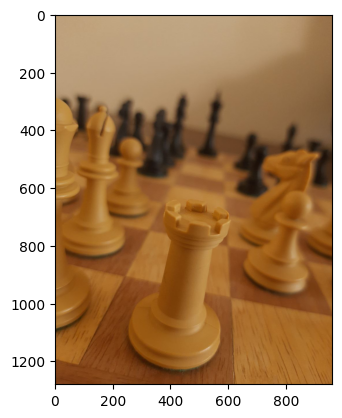

In [1]:
from matplotlib.image import imread

import matplotlib.pyplot as plt
import numpy as np
import os

# import the image: 
A = imread(os.path.join('chess_pic.jpg'))

plt.imshow(A)


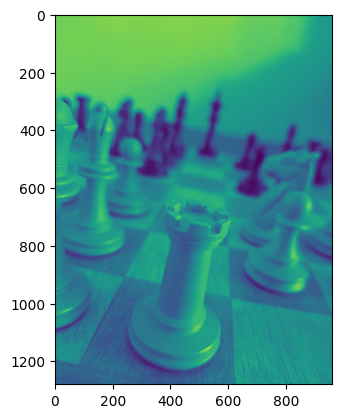

In [2]:
#------------------# this '-1' feels like magic, but this is basically
B = np.mean(A, -1) # choosing A's last dimension, turning into the mean
#------------------# of all dimensions, and storing the result in B.

plt.imshow(B)


In [3]:
# Here, we are calculating the SVD of B. 
U, S, VT = np.linalg.svd(B, full_matrices=False)


#--------------# the code above turns S into a 
S = np.diag(S) # np.array, so here we transform
#--------------# S in a diagonal matrix. 

print("U:", U.shape)
print("S:", S.shape)
print("VT:", VT.shape)


U: (1280, 960)
S: (960, 960)
VT: (960, 960)


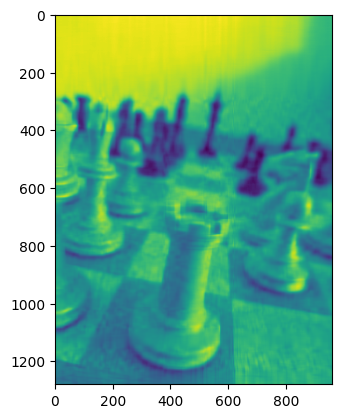

In [4]:
#-------# here is the truncation value, 
r = 28  # it defines how accurate our 
#-------# aproximation will be. 


# Construct approximate image by truncating the matrices:
Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
img = plt.imshow(Xapprox)
plt.show()

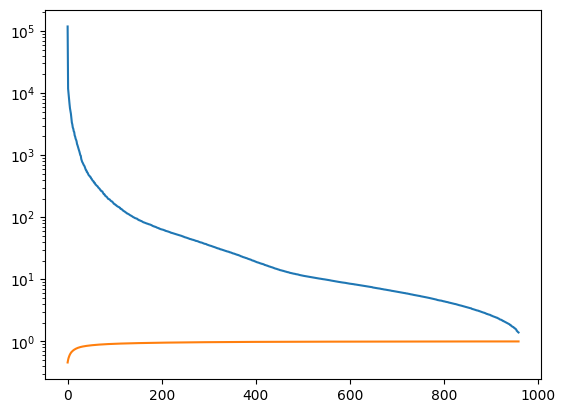

In [8]:
# Plot singular values and cumulative sum
plt.semilogy(np.diag(S)) # plots the diagonal of S with log scaling on the y-axis.
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))